ANÁLISIS INTERNACIONES EN UNA CLINICA PRIVADA DE LA CIUDAD DE MAR DEL PLATA

Autor: CP/LA Fernando Cueto
Institución: CODERHOSE

Definición del tema 

La empresa elegida es una clínica privada relacionada al rubro prestaciones de servicios médicos asistenciales. La misma se encuentra en la ciudad de Mar del Plata, Provincia de Buenos Aires, Argentina. 
Su principal objetivo es la realización de procedimientos quirúrgicos programados de alta complejidad, con la mínima estadía en internación que la recuperación del paciente permita.
La actividad estará vinculada al análisis del perfil de pacientes internados. 

El Dataset principal es un reporte obtenidos a partir de una consulta del sistema de gestión propio de la institución, donde se definen todas las internaciones ingresadas desde el año 01/2019 hasta 06/2023. El mismo se encuentra normalizado y han sido extraídos los datos secibles que la organización no desea compartir.


Importamos las librerias requeridas para poder trabajar con el data frame

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display # La utilizaremos para armar funcion de características iniciales del Dataset

Se definira el DF *"int_df"*, el cual tomará los datos del dataset principal

In [4]:
int_df=pd.read_excel("internaciones.xlsx")
int_df.head()

,ID_NroInternación(PK),FECHA INGRESO,FECHA EGRESO,ID_CodPQx(FK),EDAD,LOCALID.,ID_TipoInternacion(FK),ID_TipoIngreso(FK),ID_EspInternacion(FK),ID_TipoEgreso(FK),ID_Prestataria(FK),ID_Localidad(FK)
0,297418,2020-07-31 12:35:00,2020-07-31 14:35:00,0,74,MDP,1,2,30,1,35,131
1,298178,2020-08-26 11:50:00,2020-08-26 13:20:00,0,74,MDP,1,2,30,1,35,131
2,298722,2020-09-14 13:00:00,2020-09-14 16:20:00,0,74,MDP,1,2,30,1,35,131
3,300318,2020-11-11 10:55:00,2020-11-11 13:00:00,0,74,MDP,1,2,30,1,35,131
4,301221,2020-12-11 11:20:00,2020-12-11 13:20:00,0,74,MDP,1,2,30,1,35,131


In [5]:
# Función para ver características iniciales del dataset
def check_df(dataframe):
    print("-------------------- Forma ---------------------")
    print(dataframe.shape)
    print("--------------------- Tipo --------------------#")
    print(dataframe.dtypes)
    print("--------------------   NA  ---------------------")
    display(dataframe.isnull().sum())
    print("-----------------Estadísticas-------------------")
    display(dataframe.describe(include='all').T) #Usamos .T para transponer y ver las variables como filas

check_df(int_df)

-------------------- Forma ---------------------
(54381, 12)
--------------------- Tipo --------------------#
ID_NroInternación(PK)              int64
 FECHA INGRESO            datetime64[ns]
FECHA EGRESO              datetime64[ns]
ID_CodPQx(FK)                      int64
 EDAD                              int64
LOCALID.                          object
ID_TipoInternacion(FK)             int64
ID_TipoIngreso(FK)                 int64
ID_EspInternacion(FK)              int64
ID_TipoEgreso(FK)                  int64
ID_Prestataria(FK)                 int64
ID_Localidad(FK)                   int64
dtype: object
--------------------   NA  ---------------------


ID_NroInternación(PK)     0
 FECHA INGRESO            0
FECHA EGRESO              0
ID_CodPQx(FK)             0
 EDAD                     0
LOCALID.                  0
ID_TipoInternacion(FK)    0
ID_TipoIngreso(FK)        0
ID_EspInternacion(FK)     0
ID_TipoEgreso(FK)         0
ID_Prestataria(FK)        0
ID_Localidad(FK)          0
dtype: int64

-----------------Estadísticas-------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID_NroInternación(PK),54381.0,NaN,NaN,NaN,304826.224306,277376.0,291017.0,304707.0,318632.0,332371.0,15909.642349
FECHA INGRESO,54381,NaN,NaN,NaN,2021-03-21 07:39:15.840459008,2019-01-01 01:09:00,2019-12-20 06:25:00,2021-04-09 07:47:00,2022-05-22 07:38:00,2023-06-30 23:26:00,NaN
FECHA EGRESO,54381,NaN,NaN,NaN,2021-03-23 11:24:53.653665792,2019-01-02 10:46:00,2019-12-22 11:40:00,2021-04-12 13:07:00,2022-05-24 12:25:00,2023-07-03 13:39:00,NaN
ID_CodPQx(FK),54381.0,NaN,NaN,NaN,75299.536125,0.0,0.0,70715.0,110191.0,999986.0,114422.297775
EDAD,54381.0,NaN,NaN,NaN,51.927603,0.0,37.0,53.0,68.0,101.0,20.207104
LOCALID.,54381,252,MDP,40897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_TipoInternacion(FK),54381.0,NaN,NaN,NaN,2.070135,1.0,1.0,2.0,3.0,3.0,0.959022
ID_TipoIngreso(FK),54381.0,NaN,NaN,NaN,1.824608,1.0,1.0,2.0,2.0,3.0,0.544306
ID_EspInternacion(FK),54381.0,NaN,NaN,NaN,23.025413,1.0,12.0,27.0,30.0,40.0,11.327395
ID_TipoEgreso(FK),54381.0,NaN,NaN,NaN,1.036686,1.0,1.0,1.0,1.0,5.0,0.262944


In [6]:
int_df.columns

Index(['ID_NroInternación(PK)', ' FECHA INGRESO    ', 'FECHA EGRESO     ',
       'ID_CodPQx(FK)', ' EDAD ', 'LOCALID. ', 'ID_TipoInternacion(FK)',
       'ID_TipoIngreso(FK)', 'ID_EspInternacion(FK)', 'ID_TipoEgreso(FK)',
       'ID_Prestataria(FK)', 'ID_Localidad(FK)'],
      dtype='object')

Vamos a armar un nuevo DF para manipular los datos
Primero cambio las columnas de nombre

In [7]:
df = int_df.rename(columns={'ID_NroInternación(PK)': "Nro_Int", ' FECHA INGRESO    ': "F_Ingreso", 'FECHA EGRESO     ': "F_Egreso",'ID_CodPQx(FK)':"Cod_PQx",' EDAD ':"Edad",'LOCALID. ':"Localidad",'ID_TipoInternacion(FK)':"Cod_TipoInt",'ID_TipoIngreso(FK)':"Cod_TipoIng",'ID_EspInternacion(FK)':"Cod_EspInt",'ID_TipoEgreso(FK)':"Cod_TipoEg",'ID_Prestataria(FK)':"Cod_Prest",'ID_Localidad(FK)':"Cod_Localidad"})
df.head()


,Nro_Int,F_Ingreso,F_Egreso,Cod_PQx,Edad,Localidad,Cod_TipoInt,Cod_TipoIng,Cod_EspInt,Cod_TipoEg,Cod_Prest,Cod_Localidad
0,297418,2020-07-31 12:35:00,2020-07-31 14:35:00,0,74,MDP,1,2,30,1,35,131
1,298178,2020-08-26 11:50:00,2020-08-26 13:20:00,0,74,MDP,1,2,30,1,35,131
2,298722,2020-09-14 13:00:00,2020-09-14 16:20:00,0,74,MDP,1,2,30,1,35,131
3,300318,2020-11-11 10:55:00,2020-11-11 13:00:00,0,74,MDP,1,2,30,1,35,131
4,301221,2020-12-11 11:20:00,2020-12-11 13:20:00,0,74,MDP,1,2,30,1,35,131


Vamos a hacer un Merging con los codigos expresados en cada una de las columnas del DF y el DF correspondiente a la interpretación de cada Codigo 
Luego indexaremos por el numero de Internación

In [8]:
# Buscamos Tipos de Cobertura y Descripcion de cada Cobertura en el dataset
# Cambiamos el nombre de la columna ID_Prestataria para poder hacer el join
# Eliminamos la variable Cod_Prest ya que introducimos su descripcion al DF
int_df_TipoCob=pd.read_excel("NormalizacionDataset.xlsx", sheet_name="Dim_TipoCobertura")
int_df_TipoCob=int_df_TipoCob.rename(columns={"ID_Prestataria":"Cod_Prest"})
int_df_TipoCob=int_df_TipoCob.set_index("Cod_Prest")
int_df_TipoCob
df_internaciones1=df.merge(int_df_TipoCob, on=["Cod_Prest"], how="left")
df_internaciones1=df_internaciones1.drop(["Cod_Prest"], axis=1)
df_internaciones1

# Hacemos una columna calculada en base a la siguiente información que surge del set de datos
# Tipo de Ingreso= Si es 2 es Programado, caso contrario es de Urgencia
# Borramos la columna Cod_TipoIng

df_internaciones1["Ingreso"]=np.where(df_internaciones1["Cod_TipoIng"]==2, "Programado","Urgencia")
df_internaciones1=df_internaciones1.drop(["Cod_TipoIng"], axis=1)
df_internaciones1

# Hacemos una columna calculada en base a la siguiente información que surge del set de datos
# Tipo de Internación= Si es 1 es Clinica, Si es 2 es Obstétrica y si es 3 es Quirúrgica
# Borramos la columna Cod_TipoInt
 
df_internaciones1["Tipo_Int"]=np.where(df_internaciones1["Cod_TipoInt"]==1, "Clinica", np.where(df_internaciones1["Cod_TipoInt"]==2, "Obstetrica", "Quirurgica"))
df_internaciones1=df_internaciones1.drop(["Cod_TipoInt"], axis=1)
df_internaciones1

# Buscamos Tipos de Egreso de cada Codigo en el dataset
# Cambiamos el nombre de la columna ID_TipoEgreso(PK) para poder hacer el join
# Eliminamos la variable Cod_Prest ya que introducimos su descripcion al DF
int_df_TipoEg=pd.read_excel("NormalizacionDataset.xlsx", sheet_name="Dim_TipoEgreso")
int_df_TipoEg=int_df_TipoEg.rename(columns={"ID_TipoEgreso(PK)":"Cod_TipoEg"})
int_df_TipoEg=int_df_TipoEg.set_index("Cod_TipoEg")
int_df_TipoEg
df_internaciones1=df_internaciones1.merge(int_df_TipoEg, on=["Cod_TipoEg"], how="left")
df_internaciones1=df_internaciones1.drop(["Cod_TipoEg"], axis=1)
df_internaciones1=df_internaciones1.drop(["T.EGRESO"], axis=1)
df_internaciones1


# BuscamosEspecialidades de cada Codigo en el dataset
# Cambiamos el nombre de la columna ID_EspInternacion(PK) para poder hacer el join
# Eliminamos la variable Cod_EspInt ya que introducimos su descripcion al DF
int_df_EspInt=pd.read_excel("NormalizacionDataset.xlsx", sheet_name="Dim_EspecialidadInternación")
int_df_EspInt=int_df_EspInt.rename(columns={"ID_EspInternacion(PK)":"Cod_EspInt"})
int_df_EspInt=int_df_EspInt.set_index("Cod_EspInt")
int_df_EspInt
df_internaciones1=df_internaciones1.merge(int_df_EspInt, on=["Cod_EspInt"], how="left")
df_internaciones1=df_internaciones1.drop(["Cod_EspInt"], axis=1)
df_internaciones1=df_internaciones1.drop(["Especialidad Int"], axis=1)
df_internaciones1 = df_internaciones1.rename(columns={'Especialidad_Internacion': "Esp_Int"})
df_internaciones1

df_internaciones1

,Nro_Int,F_Ingreso,F_Egreso,Cod_PQx,Edad,Localidad,Cod_Localidad,Prestataria,Tipo_Cob,Ingreso,Tipo_Int,Tipo_Egreso,Esp_Int
0,297418,2020-07-31 12:35:00,2020-07-31 14:35:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología
1,298178,2020-08-26 11:50:00,2020-08-26 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología
2,298722,2020-09-14 13:00:00,2020-09-14 16:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología
3,300318,2020-11-11 10:55:00,2020-11-11 13:00:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología
4,301221,2020-12-11 11:20:00,2020-12-11 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54376,331095,2023-05-22 09:44:00,2023-05-23 09:49:00,130101,34,BALCARCE,18,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General
54377,331589,2023-06-07 07:25:00,2023-06-09 10:10:00,80190,56,STACLARA,222,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General
54378,331727,2023-06-12 07:50:00,2023-06-13 15:12:00,80251,62,NECOCHEA,144,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General
54379,332103,2023-06-23 08:08:00,2023-06-24 10:05:00,80263,62,MIRAMAR,138,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General


In [9]:
#Creamos una columna ID_Setor_Unico en función de la cuenta de los distintos Sectores Ocupados por cada internación en DF Dim_Ocup_Sectores
#Se mostrará el codigo del sector en la medida que la internación ocupe UN UNICO sector, caso contrario será NONE
#Esto busca establecer los parámetros necesarios para poder categorizar cada una de las internaciones
Dim_Ocup_Sectores=pd.read_excel("NormalizacionDataset.xlsx", sheet_name="Dim_Ocup_Sectores")
def adecuar_funcion(row):
    COD = row['Num_Int(FK)']
    count = Dim_Ocup_Sectores[(Dim_Ocup_Sectores['Num_Int(FK)'] == COD)].shape[0]
    if count == 1:
        return row['ID_Sector(FK)']
    else:
        return None

Dim_Ocup_Sectores['ID_Sector_Unico'] = Dim_Ocup_Sectores.apply(adecuar_funcion, axis=1)

In [10]:
Dim_Ocup_Sectores

,Num_Int(FK),SEXO,INGESO_SECTOR,EGRESO_SECTOR,ID_Sector_Internacion,ID_Sector(FK),ID_Sector_Unico
0,320843,F,2022-07-22 12:31:00,2022-07-22 13:40:00,1,11,11.0
1,314663,F,2022-01-24 12:38:00,2022-01-24 13:58:00,2,11,11.0
2,306608,F,2021-06-02 11:27:00,2021-06-02 12:58:00,3,11,11.0
3,314765,F,2022-01-26 13:17:00,2022-01-26 14:50:00,4,11,11.0
4,320658,F,2022-07-18 12:39:00,2022-07-18 13:25:00,5,11,11.0
...,...,...,...,...,...,...,...
67054,295174,F,2020-05-06 17:20:00,2020-05-19 18:30:00,58040,2,NaN
67055,327468,F,2023-02-11 20:30:00,2023-03-01 14:30:00,58046,2,NaN
67056,327468,F,2023-02-06 13:00:00,2023-02-08 20:00:00,58048,2,NaN
67057,321958,F,2022-08-24 12:21:00,2022-09-06 17:30:00,58050,2,2.0


In [11]:
#Usando el DF "Dim_Sectores" vamos a identificar el nombre de cada uno de los sectores
Dim_Sectores=pd.read_excel("NormalizacionDataset.xlsx", sheet_name="Dim_Sectores")
Dim_Sectores
Dim_Ocup_Sectores1=Dim_Ocup_Sectores.merge(Dim_Sectores, on=["ID_Sector(FK)"], how="inner")
Dim_Ocup_Sectores1=Dim_Ocup_Sectores1.drop(["Cant_Camas"], axis=1)
Dim_Ocup_Sectores1=Dim_Ocup_Sectores1.rename(columns={"Num_Int(FK)":"Nro_Int"})
Dim_Ocup_Sectores1

,Nro_Int,SEXO,INGESO_SECTOR,EGRESO_SECTOR,ID_Sector_Internacion,ID_Sector(FK),ID_Sector_Unico,Sector_Descripcion
0,320843,F,2022-07-22 12:31:00,2022-07-22 13:40:00,1,11,11.0,S.I.E
1,314663,F,2022-01-24 12:38:00,2022-01-24 13:58:00,2,11,11.0,S.I.E
2,306608,F,2021-06-02 11:27:00,2021-06-02 12:58:00,3,11,11.0,S.I.E
3,314765,F,2022-01-26 13:17:00,2022-01-26 14:50:00,4,11,11.0,S.I.E
4,320658,F,2022-07-18 12:39:00,2022-07-18 13:25:00,5,11,11.0,S.I.E
...,...,...,...,...,...,...,...,...
67054,310490,F,NaT,NaT,54138,1,1.0,NaN
67055,309760,F,NaT,NaT,65574,1,1.0,NaN
67056,307568,M,NaT,NaT,49397,1,1.0,NaN
67057,310513,M,NaT,NaT,51659,1,1.0,NaN


In [12]:
#Al DF Dim_Ocup_Secores1 le vamos a quitar los registros duplicados de internaciones, a los efectos de hacer un merge con el DF original
Dim_Ocup_Sectores2=Dim_Ocup_Sectores1.drop_duplicates(subset=["Nro_Int"])
check_df(Dim_Ocup_Sectores2)

-------------------- Forma ---------------------
(52637, 8)
--------------------- Tipo --------------------#
Nro_Int                           int64
SEXO                             object
INGESO_SECTOR            datetime64[ns]
EGRESO_SECTOR            datetime64[ns]
ID_Sector_Internacion             int64
ID_Sector(FK)                     int64
ID_Sector_Unico                 float64
Sector_Descripcion               object
dtype: object
--------------------   NA  ---------------------


Nro_Int                      0
SEXO                         0
INGESO_SECTOR                7
EGRESO_SECTOR              203
ID_Sector_Internacion        0
ID_Sector(FK)                0
ID_Sector_Unico          10030
Sector_Descripcion           7
dtype: int64

-----------------Estadísticas-------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Nro_Int,52637.0,NaN,NaN,NaN,304821.286965,277376.0,291075.0,304707.0,318558.0,332371.0,15867.231198
SEXO,52637,2,F,30366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INGESO_SECTOR,52630,NaN,NaN,NaN,2021-03-20 16:50:57.203495936,1946-05-05 10:20:00,2019-12-21 15:11:15,2021-04-09 09:03:30,2022-05-19 17:42:00,2023-07-01 18:12:00,NaN
EGRESO_SECTOR,52434,NaN,NaN,NaN,2021-03-23 03:23:47.210206976,2018-01-04 14:40:00,2019-12-24 15:00:00,2021-04-12 19:00:00,2022-05-21 10:15:00,2023-09-27 09:50:00,NaN
ID_Sector_Internacion,52637.0,NaN,NaN,NaN,34018.78213,1.0,17688.0,33785.0,51085.0,67335.0,19928.205317
ID_Sector(FK),52637.0,NaN,NaN,NaN,10.473108,1.0,4.0,11.0,17.0,20.0,5.82612
ID_Sector_Unico,42607.0,NaN,NaN,NaN,10.467059,1.0,4.0,11.0,17.0,20.0,5.542527
Sector_Descripcion,52630,18,S.I.E,11711,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a proceder a ingresar columnas calculadas
 Dias de estada= fecha egreso - fecha de ingreso (expresar en días). Esto es necesario para cumplir los requisitos de clasificaciones de las internaciones que requieren desde la organización.
 Por otro lado incorporaremos la variable de SEXO del DF Dim_Ocup_Sectores2 a los efectos de realizar análisis con esta infromación
Vamos asimismo a indexar el DF con la columna Numero de Internación, ya que cumple con los requisitos para ser considerada un indice de la tabla

In [13]:
df_internaciones1["Estada"]=df_internaciones1["F_Egreso"]-df_internaciones1["F_Ingreso"]
df_internaciones1["Estada_f"]=df_internaciones1["Estada"]/np.timedelta64(1, "D")

df_internaciones1=pd.merge(df_internaciones1,Dim_Ocup_Sectores2, on=["Nro_Int"], how="left")
df_internaciones1=df_internaciones1.drop(["INGESO_SECTOR"], axis=1)
df_internaciones1=df_internaciones1.drop(["EGRESO_SECTOR"], axis=1)
df_internaciones1=df_internaciones1.drop(["ID_Sector_Internacion"], axis=1)
df_internaciones1=df_internaciones1.drop(["ID_Sector(FK)"], axis=1)
df_internaciones1=df_internaciones1.set_index("Nro_Int")
df_internaciones1

,F_Ingreso,F_Egreso,Cod_PQx,Edad,Localidad,Cod_Localidad,Prestataria,Tipo_Cob,Ingreso,Tipo_Int,Tipo_Egreso,Esp_Int,Estada,Estada_f,SEXO,ID_Sector_Unico,Sector_Descripcion
Nro_Int,,,,,,,,,,,,,,,,,
297418,2020-07-31 12:35:00,2020-07-31 14:35:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:00:00,0.083333,F,11.0,S.I.E
298178,2020-08-26 11:50:00,2020-08-26 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 01:30:00,0.062500,F,11.0,S.I.E
298722,2020-09-14 13:00:00,2020-09-14 16:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 03:20:00,0.138889,M,11.0,S.I.E
300318,2020-11-11 10:55:00,2020-11-11 13:00:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:05:00,0.086806,F,11.0,S.I.E
301221,2020-12-11 11:20:00,2020-12-11 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:00:00,0.083333,F,11.0,S.I.E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331095,2023-05-22 09:44:00,2023-05-23 09:49:00,130101,34,BALCARCE,18,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General,1 days 00:05:00,1.003472,M,4.0,3Er.Piso
331589,2023-06-07 07:25:00,2023-06-09 10:10:00,80190,56,STACLARA,222,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General,2 days 02:45:00,2.114583,F,18.0,Uip 2
331727,2023-06-12 07:50:00,2023-06-13 15:12:00,80251,62,NECOCHEA,144,OSDE,PREPAGA,Programado,Quirurgica,Alta Médica,Cx General,1 days 07:22:00,1.306944,M,4.0,3Er.Piso


Clasificacion de las Internaciones

     Pasos para la clasificación del reporte de Internaciones
        Clasificación de Internaciones
            a)	Oncológica Ambulatoria: Son AMBULATORIAS y se definen como aquellas “internaciones” que los días sean menores que 1 y que el sector ocupado sea exclusivamente ONCOLOGÍA (S.I.E)
            b)	Quirúrgica Ambulatoria: Son AMBULATORIAS y se definen como aquellas “internaciones” que los días sean menores que 1 y que el sector ocupado sea exclusivamente QUIROFANO
            c)	Neonatológicas: Internaciones donde el sector ocupado sea igual exclusivamente Terapia NEONATAL
            d)	Nacimientos: Internaciones donde el código de Practica Quirúrgica sea igual a 110401 u 110403 u 110404 u 110104 y el especialista sea OBSTETRA.
            e)	Quirúrgicas: Internaciones donde los días ocupados sean menores que 16 y, el código de Practica Qx sea >0 y distinto de: 50202, 70150, 70615, 70715 y 110311, 121501 y 236222 y 289016 y 360102 y 880104 y 880110.
            f)	Clin/Qx: Internaciones donde los días ocupados sean mayores o igual a 16 y, el código de Practica Qx sea >0 y distinto de: 50202 y 70150 y 70615 y 70715 y 110311 y 121501 y 236222 y 289016 y 360102 y 880104 y 880110.
            g)	Clínicas: Se definen como residuo de todas las anteriores definidas anteriormente, es decir que si no cumplen las condiciones anteriores serán clínicas.


In [14]:
df_internaciones1["Clasificacion"]= np.where((df_internaciones1["Estada_f"]<1) & (df_internaciones1["ID_Sector_Unico"].notnull()) & (df_internaciones1["Sector_Descripcion"]=="S.I.E"), "Oncologica Ambulatoria",
                                        np.where((df_internaciones1["Estada_f"]<1) & (df_internaciones1["ID_Sector_Unico"].notnull()) & (df_internaciones1["Sector_Descripcion"]=="Quirofan"), "Quirurgica Ambulatoria",
                                              np.where((df_internaciones1["ID_Sector_Unico"].notnull()) & (df_internaciones1["Sector_Descripcion"]=="T.Neonat"), "Neonatologicas",
                                                       np.where((df_internaciones1["Estada_f"]>=1) & (df_internaciones1["Esp_Int"]=="Cx Obstetrica") & ((df_internaciones1["Cod_PQx"]==110401)|(df_internaciones1["Cod_PQx"]==110403)|(df_internaciones1["Cod_PQx"]==110404)|(df_internaciones1["Cod_PQx"]==110104)), "Nacimientos",
                                                                np.where((df_internaciones1["Estada_f"]<16) & ((df_internaciones1["Cod_PQx"]!=0)&(df_internaciones1["Cod_PQx"]!=50202)&(df_internaciones1["Cod_PQx"]!=70150)&(df_internaciones1["Cod_PQx"]!=70615)&(df_internaciones1["Cod_PQx"]!=70715)&(df_internaciones1["Cod_PQx"]!=110311)&(df_internaciones1["Cod_PQx"]!=121501)&(df_internaciones1["Cod_PQx"]!=236222)&(df_internaciones1["Cod_PQx"]!=289016)&(df_internaciones1["Cod_PQx"]!=360102)&(df_internaciones1["Cod_PQx"]!=880104)&(df_internaciones1["Cod_PQx"]!=880110)), "Quirurgicas",
                                                                         np.where((df_internaciones1["Estada_f"]>=16) & ((df_internaciones1["Cod_PQx"]!=0)&(df_internaciones1["Cod_PQx"]!=50202)&(df_internaciones1["Cod_PQx"]!=70150)&(df_internaciones1["Cod_PQx"]!=70615)&(df_internaciones1["Cod_PQx"]!=70715)&(df_internaciones1["Cod_PQx"]!=110311)&(df_internaciones1["Cod_PQx"]!=121501)&(df_internaciones1["Cod_PQx"]!=236222)&(df_internaciones1["Cod_PQx"]!=289016)&(df_internaciones1["Cod_PQx"]!=360102)&(df_internaciones1["Cod_PQx"]!=880104)&(df_internaciones1["Cod_PQx"]!=880110)), "Clin/Qx",
                                                 "Clinicas"))))))
df_internaciones1.head()

,F_Ingreso,F_Egreso,Cod_PQx,Edad,Localidad,Cod_Localidad,Prestataria,Tipo_Cob,Ingreso,Tipo_Int,Tipo_Egreso,Esp_Int,Estada,Estada_f,SEXO,ID_Sector_Unico,Sector_Descripcion,Clasificacion
Nro_Int,,,,,,,,,,,,,,,,,,
297418,2020-07-31 12:35:00,2020-07-31 14:35:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:00:00,0.083333,F,11.0,S.I.E,Oncologica Ambulatoria
298178,2020-08-26 11:50:00,2020-08-26 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 01:30:00,0.062500,F,11.0,S.I.E,Oncologica Ambulatoria
298722,2020-09-14 13:00:00,2020-09-14 16:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 03:20:00,0.138889,M,11.0,S.I.E,Oncologica Ambulatoria
300318,2020-11-11 10:55:00,2020-11-11 13:00:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:05:00,0.086806,F,11.0,S.I.E,Oncologica Ambulatoria
301221,2020-12-11 11:20:00,2020-12-11 13:20:00,0,74,MDP,131,IOMA,IOMA,Programado,Clinica,Alta Médica,Oncología,0 days 02:00:00,0.083333,F,11.0,S.I.E,Oncologica Ambulatoria


Vamos a realizar un análisis exploratorio del DF definitivo, antes de comenzar con el análisis gráfico.
Usamos la función check_df definida anteriormente

In [15]:
check_df(df_internaciones1)

-------------------- Forma ---------------------
(54381, 18)
--------------------- Tipo --------------------#
F_Ingreso              datetime64[ns]
F_Egreso               datetime64[ns]
Cod_PQx                         int64
Edad                            int64
Localidad                      object
Cod_Localidad                   int64
Prestataria                    object
Tipo_Cob                       object
Ingreso                        object
Tipo_Int                       object
Tipo_Egreso                    object
Esp_Int                        object
Estada                timedelta64[ns]
Estada_f                      float64
SEXO                           object
ID_Sector_Unico               float64
Sector_Descripcion             object
Clasificacion                  object
dtype: object
--------------------   NA  ---------------------


F_Ingreso                 0
F_Egreso                  0
Cod_PQx                   0
Edad                      0
Localidad                 0
Cod_Localidad             0
Prestataria               0
Tipo_Cob                  0
Ingreso                   0
Tipo_Int                  0
Tipo_Egreso               0
Esp_Int                   0
Estada                    0
Estada_f                  0
SEXO                   1744
ID_Sector_Unico       11774
Sector_Descripcion     1751
Clasificacion             0
dtype: int64

-----------------Estadísticas-------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
F_Ingreso,54381,NaN,NaN,NaN,2021-03-21 07:39:15.840459008,2019-01-01 01:09:00,2019-12-20 06:25:00,2021-04-09 07:47:00,2022-05-22 07:38:00,2023-06-30 23:26:00,NaN
F_Egreso,54381,NaN,NaN,NaN,2021-03-23 11:24:53.653665792,2019-01-02 10:46:00,2019-12-22 11:40:00,2021-04-12 13:07:00,2022-05-24 12:25:00,2023-07-03 13:39:00,NaN
Cod_PQx,54381.0,NaN,NaN,NaN,75299.536125,0.0,0.0,70715.0,110191.0,999986.0,114422.297775
Edad,54381.0,NaN,NaN,NaN,51.927603,0.0,37.0,53.0,68.0,101.0,20.207104
Localidad,54381,252,MDP,40897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cod_Localidad,54381.0,NaN,NaN,NaN,130.914419,1.0,131.0,131.0,131.0,252.0,35.993037
Prestataria,54381,110,IOMA,23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Cob,54381,7,IOMA,23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingreso,54381,2,Programado,36597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Int,54381,3,Quirurgica,27048,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Del análisis podemos ver que:
    1) Se mantienen la cantidad de registros respecto del DF original (54381)
    2) En el análsiis de los datos faltantes, podemos ver que la hay 1744 internaciones que no tienen asigado el sexo (1744/54381=3.2%) 
    3) Haremos un análisis de los datos faltantes, a los efectos de poder tomar una conducta

Exploraremos acerca de los datos nulos obtenidos

<Axes: >

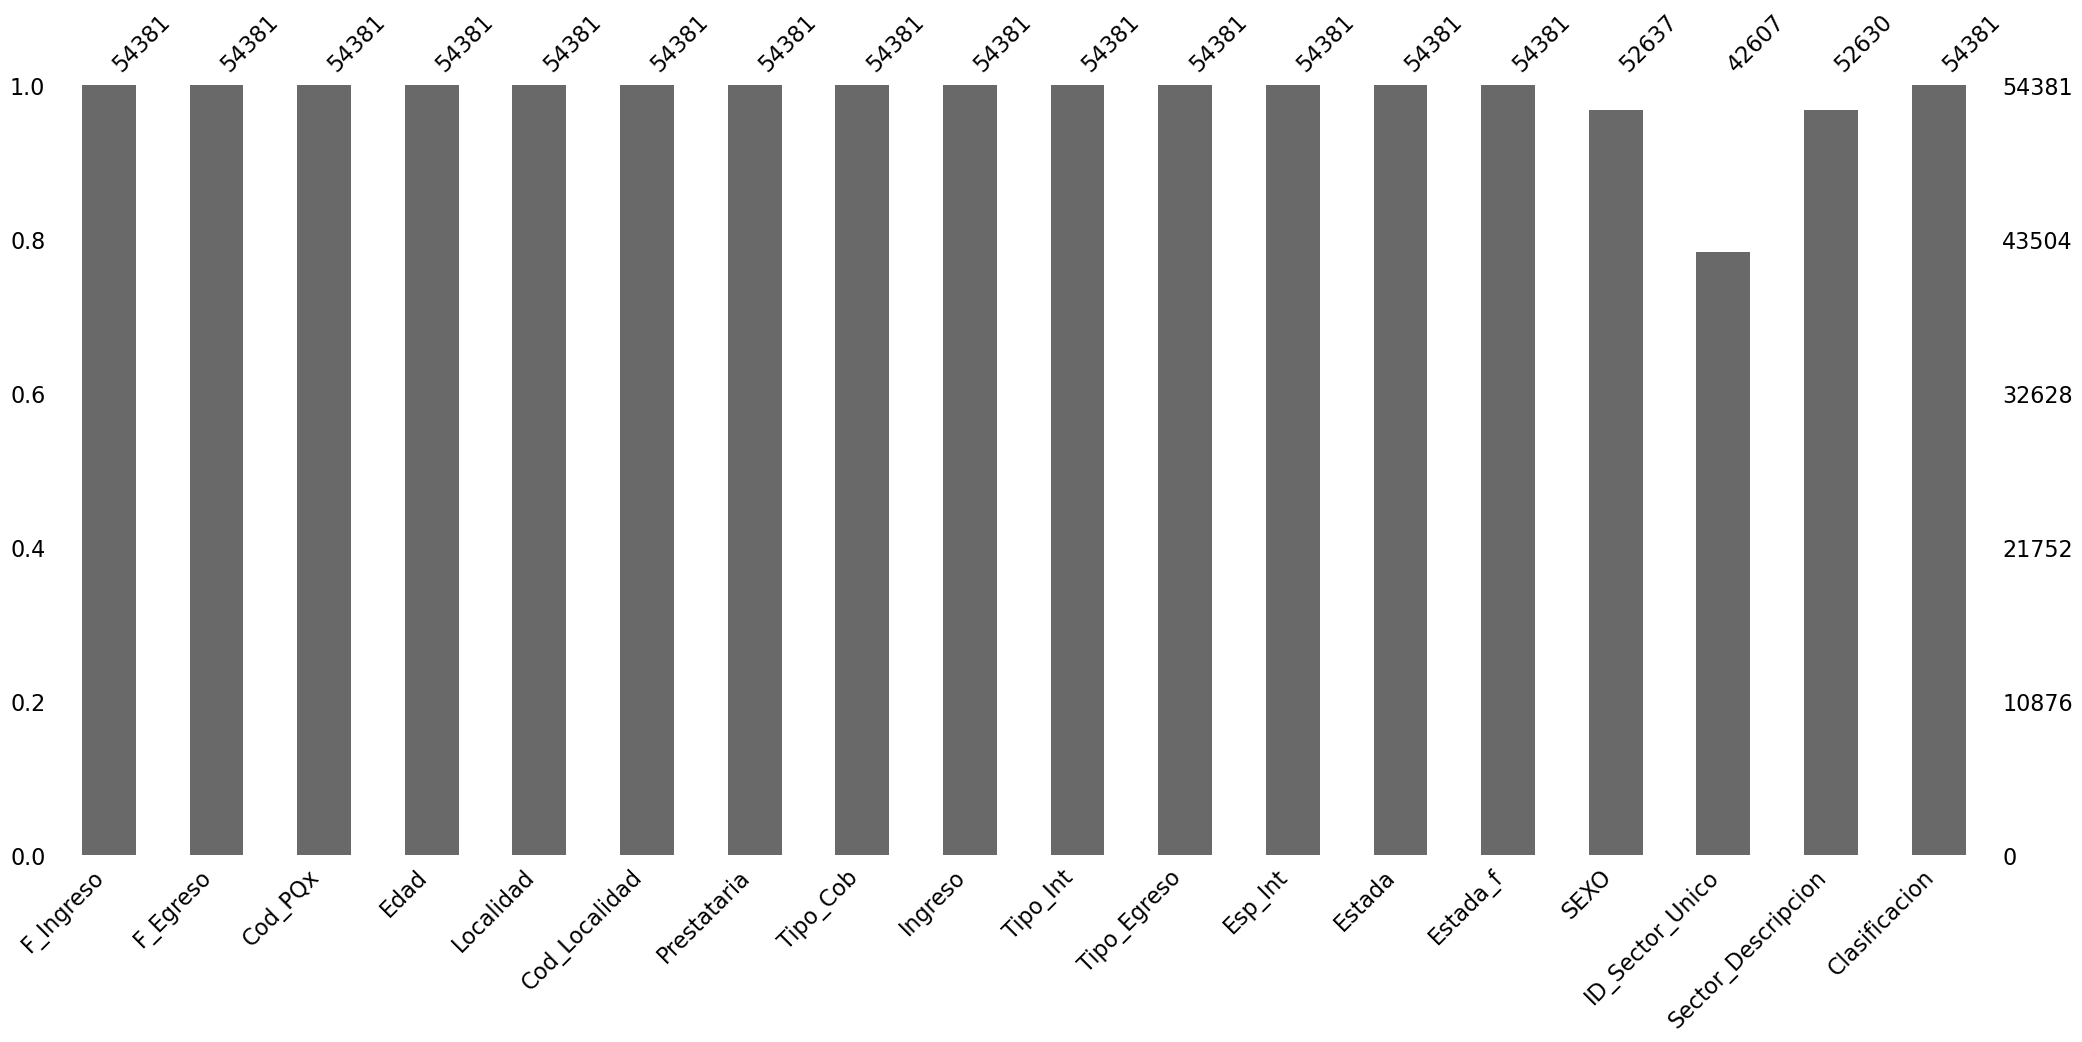

In [16]:
import missingno as msno
msno.bar(df_internaciones1)

<Axes: >

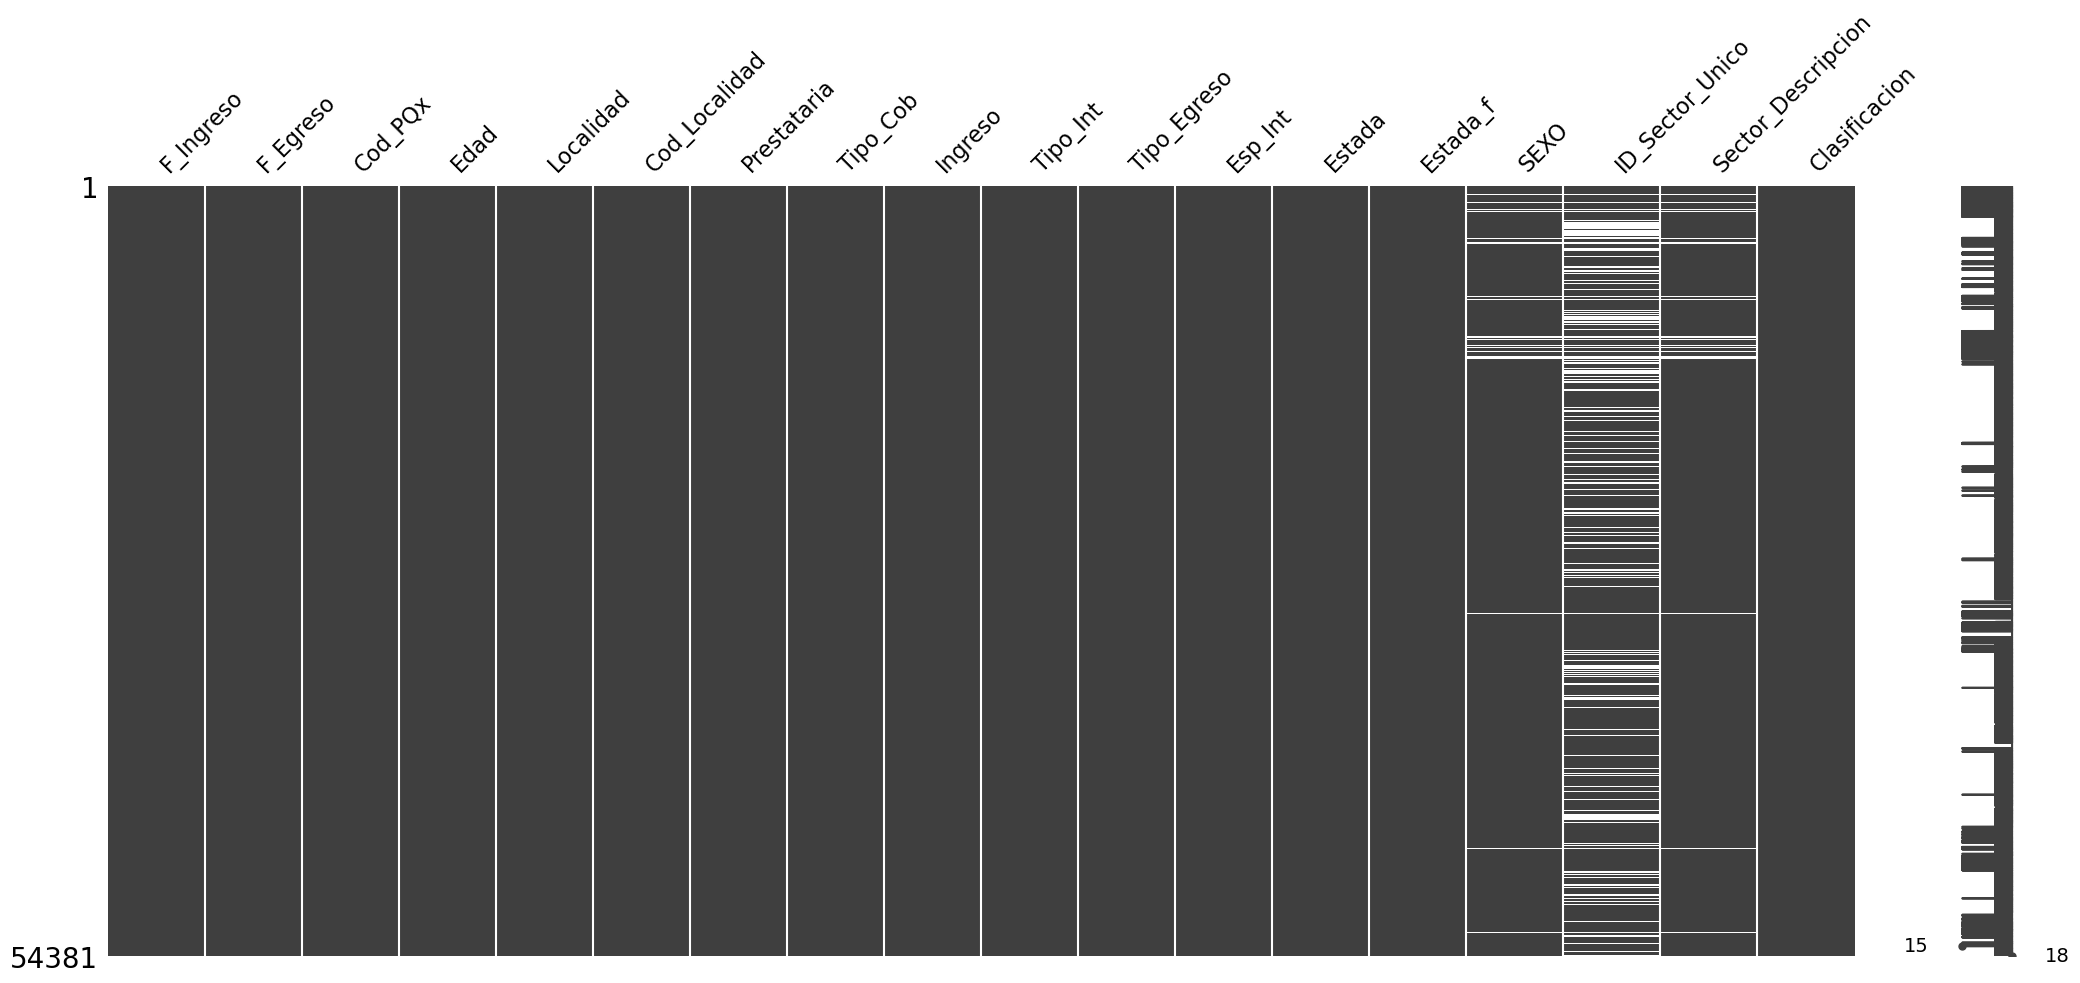

In [17]:
msno.matrix(df_internaciones1)

<Axes: >

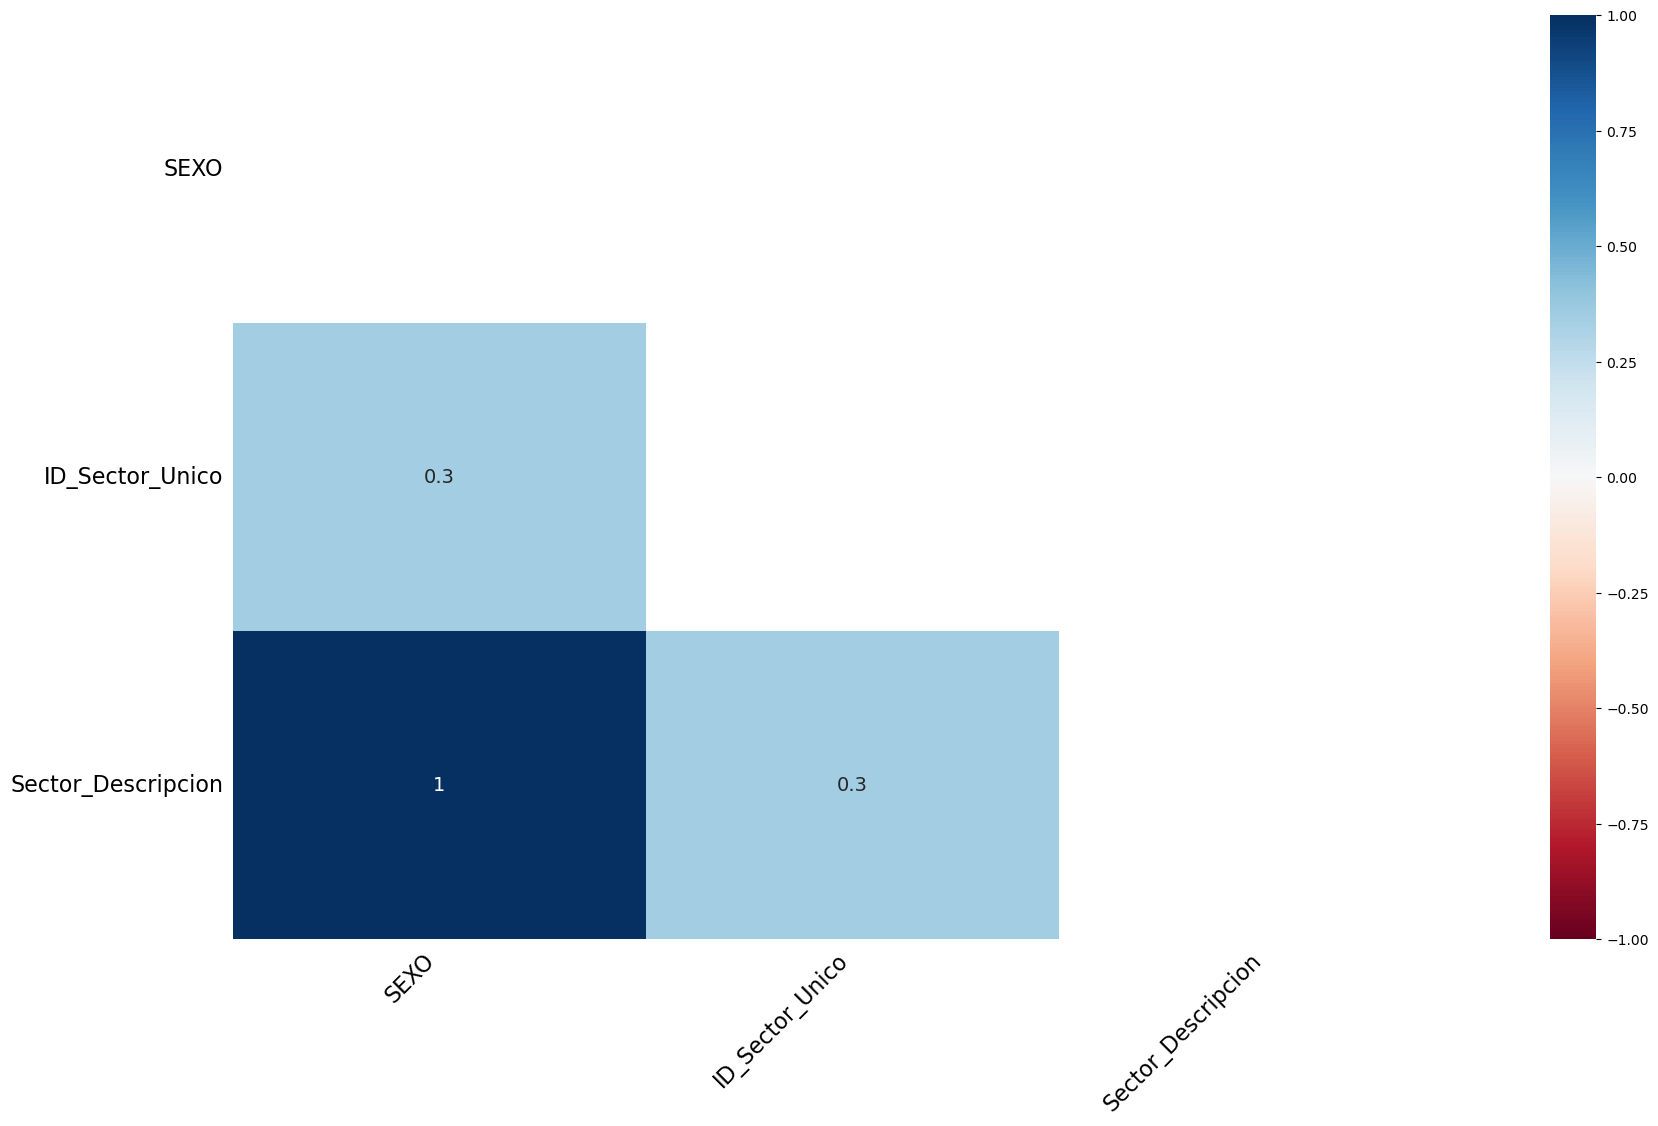

In [18]:
msno.heatmap(df_internaciones1)

Del análisis de datos faltantes podemos ver
    1) Los datos faltantes están intimamente relacionados en los casos de SEXO (1744) y Sector_Decripción (1751)
    2) Es esperable en la columna ID_Sector_Unico los datos faltantes sean 11774, (10030 DF original sin sector único + 1744 sin datos del merge)
    3) La falta de datos respecto del merge en 1744 internaciones, hace que dudemos de la clasificacion asumida 
    4) Dado que la clasificación es una variable categórica importante para la institución, podemos tomar la medida de eliminar los datos (dado que no supera el 3.5% de los registros) 

In [19]:
df_int_final=df_internaciones1.dropna(subset=["Sector_Descripcion"])
check_df(df_int_final)

-------------------- Forma ---------------------
(52630, 18)
--------------------- Tipo --------------------#
F_Ingreso              datetime64[ns]
F_Egreso               datetime64[ns]
Cod_PQx                         int64
Edad                            int64
Localidad                      object
Cod_Localidad                   int64
Prestataria                    object
Tipo_Cob                       object
Ingreso                        object
Tipo_Int                       object
Tipo_Egreso                    object
Esp_Int                        object
Estada                timedelta64[ns]
Estada_f                      float64
SEXO                           object
ID_Sector_Unico               float64
Sector_Descripcion             object
Clasificacion                  object
dtype: object
--------------------   NA  ---------------------


F_Ingreso                 0
F_Egreso                  0
Cod_PQx                   0
Edad                      0
Localidad                 0
Cod_Localidad             0
Prestataria               0
Tipo_Cob                  0
Ingreso                   0
Tipo_Int                  0
Tipo_Egreso               0
Esp_Int                   0
Estada                    0
Estada_f                  0
SEXO                      0
ID_Sector_Unico       10030
Sector_Descripcion        0
Clasificacion             0
dtype: int64

-----------------Estadísticas-------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
F_Ingreso,52630,NaN,NaN,NaN,2021-03-21 04:01:10.673000192,2019-01-01 01:09:00,2019-12-21 12:36:30,2021-04-09 07:20:00,2022-05-19 18:07:00,2023-06-30 23:26:00,NaN
F_Egreso,52630,NaN,NaN,NaN,2021-03-23 09:29:02.229906944,2019-01-02 10:46:00,2019-12-24 09:18:45,2021-04-12 13:06:00,2022-05-22 16:00:00,2023-07-03 13:39:00,NaN
Cod_PQx,52630.0,NaN,NaN,NaN,77486.99696,0.0,0.0,70720.0,110210.0,999986.0,115583.35131
Edad,52630.0,NaN,NaN,NaN,51.434543,0.0,37.0,53.0,68.0,101.0,20.204386
Localidad,52630,252,MDP,39496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cod_Localidad,52630.0,NaN,NaN,NaN,130.93479,1.0,131.0,131.0,131.0,252.0,36.119989
Prestataria,52630,110,IOMA,22221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Cob,52630,7,IOMA,22221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingreso,52630,2,Programado,34855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Int,52630,3,Quirurgica,27012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Una vez definida la estrategia respecto de los datos faltantes, procederemos a realizar los análisis numericos y gráficos solicitados por la institución

1) Conocer la distribución etaria de los pacientes atendidos
2) Conocer la distribución de las internaciones en los distintos meses del año
3) Conocer la estada promedio por cada tipo de internación, según la clasificacion establecida
4) Analizar los desvíos en las estadas de pacientes y vincularlo con la edad, definiendo rangos etareos de 5 en 5

In [20]:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

In [21]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [120]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [22]:
# Configurando seaborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

In [23]:
df_int_final.Edad.describe()

count    52630.000000
mean        51.434543
std         20.204386
min          0.000000
25%         37.000000
50%         53.000000
75%         68.000000
max        101.000000
Name: Edad, dtype: float64

In [24]:
df_int_final.Edad.median()

53.0

In [25]:
df_int_final.Edad.mode()

0    63
Name: Edad, dtype: int64

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


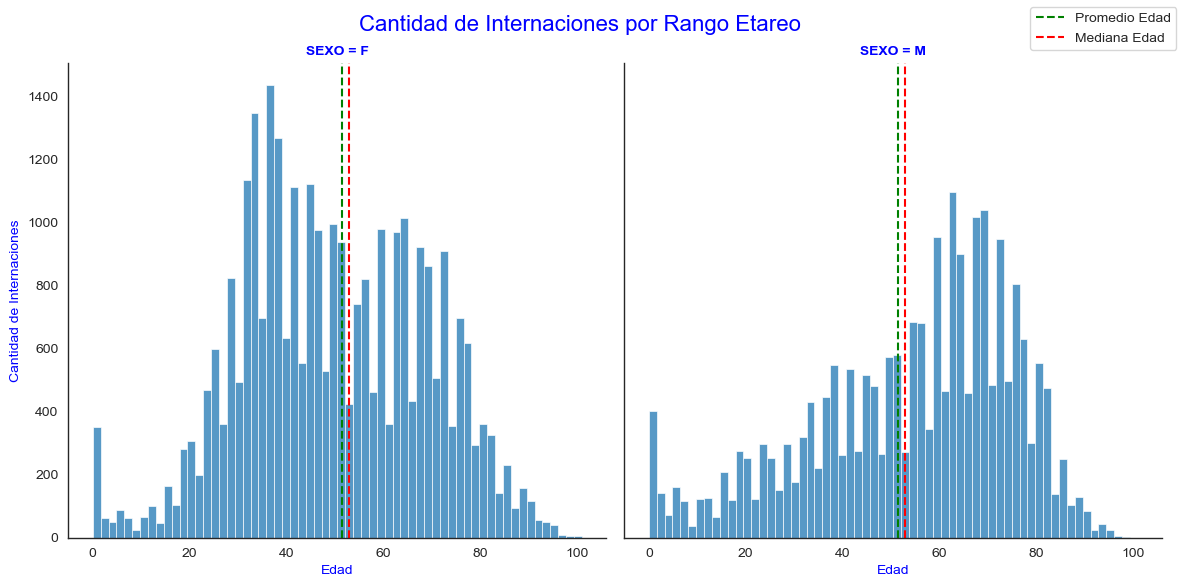

In [26]:
g = sns.displot(df_int_final, x = "Edad", kind ="hist", col ='SEXO')
for ax in g.axes.flat:
    ax.axvline(df_int_final.Edad.mean(), color="green", linestyle="dashed")
for ax in g.axes.flat:
    ax.axvline(df_int_final.Edad.median(), color="red", linestyle="dashed")
g.fig.legend(labels = ["Promedio Edad", "Mediana Edad"])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Cantidad de Internaciones por Rango Etareo",fontsize=16, color="blue")
g.set(xlabel='Edad', ylabel='Cantidad de Internaciones')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

Cantidad de Inetrnaciones por Genero

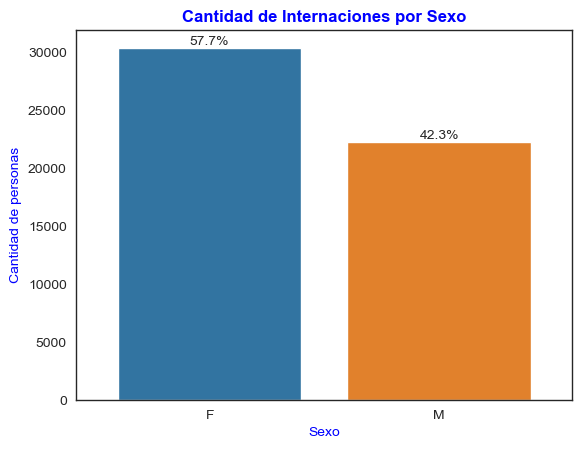

In [27]:
# Gráfico de barra countplot
ax = sns.countplot(data=df_int_final, x="SEXO") #  Axes-level / FacetGRid
ax.set_title("Cantidad de Internaciones por Sexo")
ax.set_ylabel("Cantidad de personas")
ax.set_xlabel("Sexo")
# Para ver porcentaje
# Cantidad total
total = df_int_final['SEXO'].count()
# anotar las barras con fmt de matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
# # agrega espacio al final de la barra para las etiquetas
ax.margins(x=0.1)

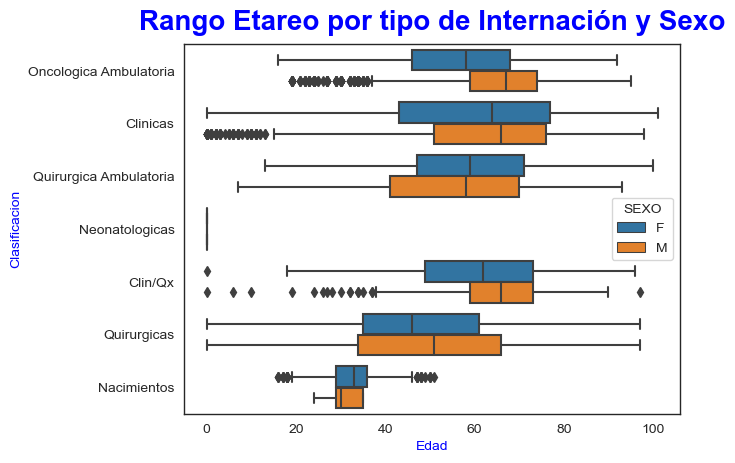

In [28]:
sns.boxplot(x='Edad', y = 'Clasificacion', hue="SEXO", data = df_int_final)
plt.title("Rango Etareo por tipo de Internación y Sexo", fontsize=20, verticalalignment='bottom');

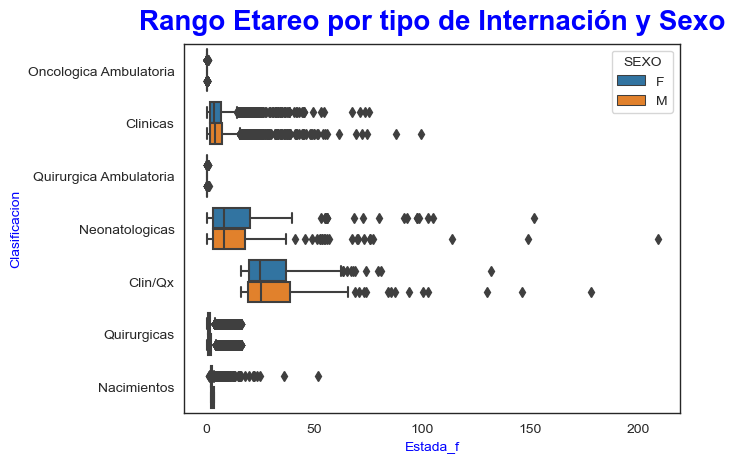

In [29]:
sns.boxplot(x='Estada_f', y ='Clasificacion' , hue="SEXO", data = df_int_final)
plt.title("Rango Etareo por tipo de Internación y Sexo", fontsize=20, verticalalignment='bottom');

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


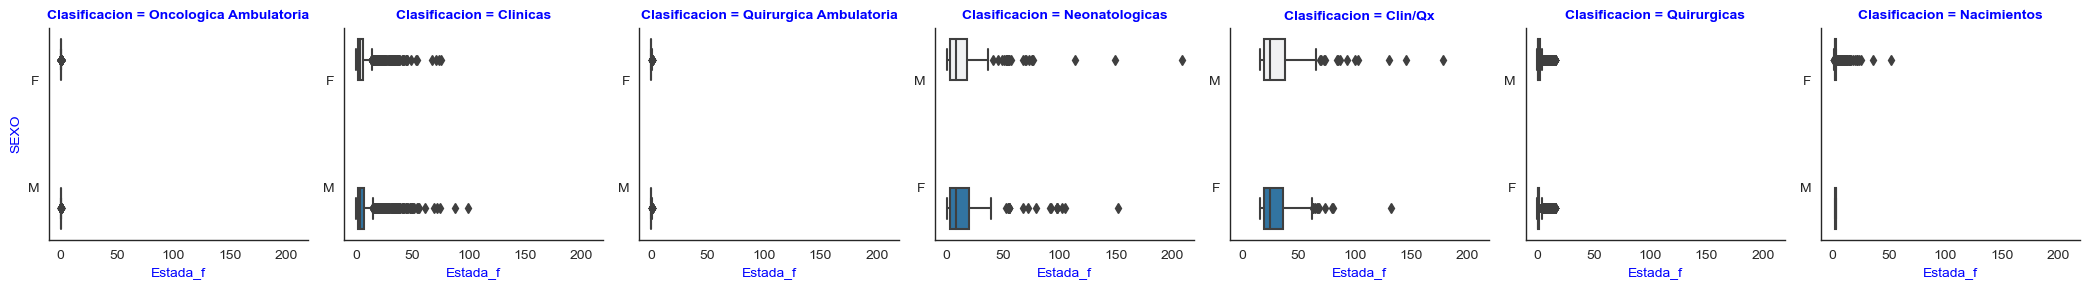

In [30]:
g = sns.FacetGrid(df_int_final, col="Clasificacion", sharey=False)
g.map_dataframe(sns.boxplot, x='Estada_f', y='SEXO', hue='SEXO')

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


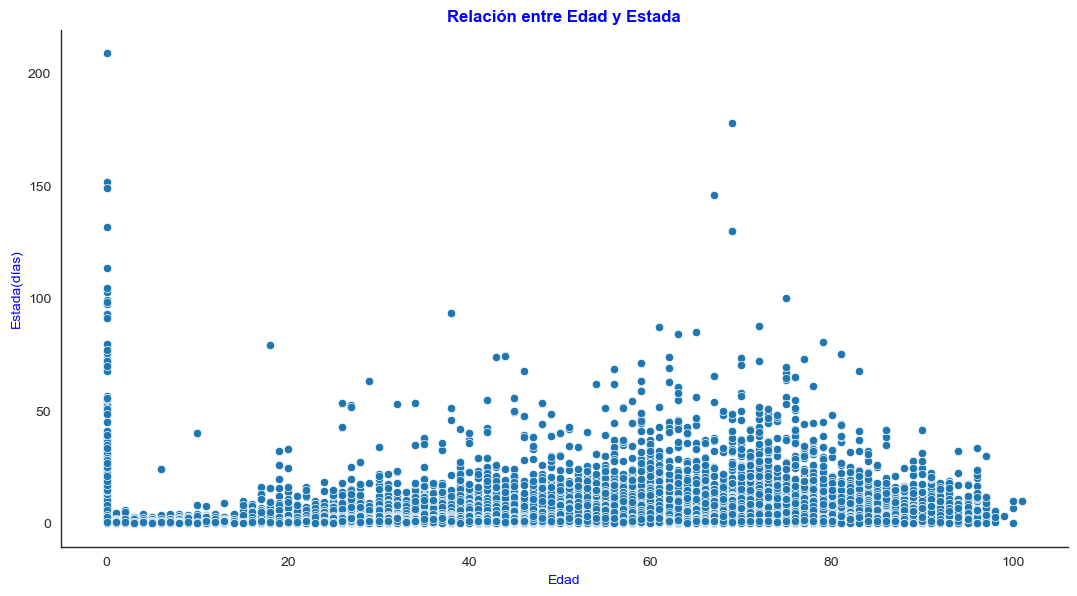

In [41]:
g = sns.relplot(
    data= df_int_final,
    x="Edad", y="Estada_f", kind ='scatter')
g.set(xlabel='Edad', ylabel='Estada(días)', title='Relación entre Edad y Estada')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

In [57]:
EdadxT_Cob=df_int_final.groupby("Clasificacion")["Edad"].count()
EdadxT_Cob

Clasificacion
Clin/Qx                     426
Clinicas                   7959
Nacimientos                4307
Neonatologicas              558
Oncologica Ambulatoria    11691
Quirurgica Ambulatoria     3483
Quirurgicas               24206
Name: Edad, dtype: int64

In [82]:
df_internaciones1.groupby("Localidad")["Edad"].count()

Localidad
25DEMAYO     1
9DEJULIO     1
???         15
ACASSUSO     1
ADROGUE      1
            ..
VILLA LO     1
VILLA NU     1
VILLEGAS     4
VIVORATA    28
YERBA B      1
Name: Edad, Length: 252, dtype: int64

In [20]:
df_internaciones1.groupby("Tipo_Int")["Edad"].count()

Tipo_Int
Clinica       23234
Obstetrica     4099
Quirurgica    27048
Name: Edad, dtype: int64

In [197]:
#Promedio de estada por tipo de Internación
df_internaciones1.groupby("Ingreso")["Estada"].mean()

Ingreso
Programado   0 days 18:40:10.127059595
Urgencia     4 days 23:51:26.032388663
Name: Estada, dtype: timedelta64[ns]

In [106]:
df_EstadaxClasif=df_int_final.groupby("Clasificacion")["Estada_f"].count()
df_EstadaxClasif


Clasificacion
Clin/Qx                     426
Clinicas                   7959
Nacimientos                4307
Neonatologicas              558
Oncologica Ambulatoria    11691
Quirurgica Ambulatoria     3483
Quirurgicas               24206
Name: Estada_f, dtype: int64

ValueError: could not convert string to float: 'Oncologica Ambulatoria'

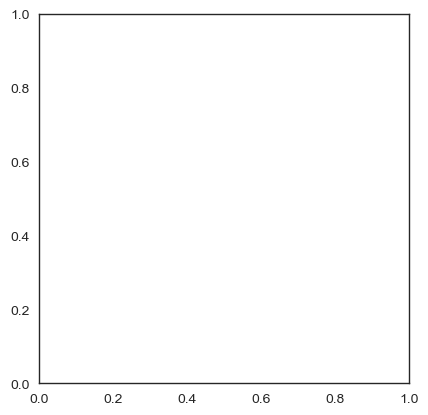

In [109]:
# Graficar
plt.pie(df_int_final["Clasificacion"], autopct='%1.1f%%')
plt.title('Clasificaciones de Internaciones en el Período')
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular
plt.legend(title="Clasificacion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()